# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [27]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key + "&q="

In [29]:
count = 0
city_name = []
clouds = []
latitude = []
max_temp = []
long = []
country = []
humidity = []
wind_speed = []
date = []

# Loop through each city
for city in cities:
    city_url = query_url + city
    try:
        response = requests.get(city_url).json()
#pprint(response)
        count+= 1       
        city_name.append(response['name'])
        clouds.append(response['clouds']['all'])
        latitude.append(response['coord']['lat'])
        max_temp.append(response['main']['temp_max'])
        long.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])

        print(f"{city} found! this is city number {count}")
        
        
    # Handle exceptions for a character that is not available in the Star Wars API
    except:
        # Append null values
        print("Missing Information, skipping this city")
        pass

atuona found! this is city number 1
busselton found! this is city number 2
paracelis found! this is city number 3
ulladulla found! this is city number 4
ushuaia found! this is city number 5
Missing Information, skipping this city
khandbari found! this is city number 7
hilo found! this is city number 8
coihaique found! this is city number 9
rikitea found! this is city number 10
mataura found! this is city number 11
yulara found! this is city number 12
arraial do cabo found! this is city number 13
mahebourg found! this is city number 14
mazagao found! this is city number 15
orebro found! this is city number 16
hambantota found! this is city number 17
hithadhoo found! this is city number 18
zyryanka found! this is city number 19
Missing Information, skipping this city
te anau found! this is city number 21
ourossogui found! this is city number 22
bethel found! this is city number 23
tabou found! this is city number 24
saskylakh found! this is city number 25
bluff found! this is city number

cherskiy found! this is city number 208
sao gabriel da cachoeira found! this is city number 209
Missing Information, skipping this city
batagay found! this is city number 211
guerrero negro found! this is city number 212
aklavik found! this is city number 213
kenai found! this is city number 214
auki found! this is city number 215
bratsk found! this is city number 216
pudozh found! this is city number 217
grindavik found! this is city number 218
ilulissat found! this is city number 219
charlestown found! this is city number 220
lagoa found! this is city number 221
baiquan found! this is city number 222
high prairie found! this is city number 223
georgetown found! this is city number 224
khatanga found! this is city number 225
montepuez found! this is city number 226
cururupu found! this is city number 227
alvarado found! this is city number 228
avera found! this is city number 229
asfi found! this is city number 230
florence found! this is city number 231
ust-shonosha found! this is ci

taksimo found! this is city number 414
thayetmyo found! this is city number 415
hovd found! this is city number 416
aberdeen found! this is city number 417
aripuana found! this is city number 418
dharchula found! this is city number 419
vanimo found! this is city number 420
maturin found! this is city number 421
dingle found! this is city number 422
ust-tsilma found! this is city number 423
ambilobe found! this is city number 424
hunxe found! this is city number 425
caxias found! this is city number 426
ulaanbaatar found! this is city number 427
kurumkan found! this is city number 428
bilma found! this is city number 429
arman found! this is city number 430
olavarria found! this is city number 431
alta floresta found! this is city number 432
assare found! this is city number 433
dessalines found! this is city number 434
natal found! this is city number 435
namwala found! this is city number 436
luganville found! this is city number 437
itarema found! this is city number 438
bilibino fo

havoysund found! this is city number 618


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
city_weather_df = pd.DataFrame({
    'City': city_name,
    'Cloudiness': clouds,
    'Country': country,
    'Date': date,
    'Humidity': humidity,
    'Lat': latitude,
    'Lng': long,
    'Max Temp': max_temp,
    'Wind Speed': wind_speed
})
city_weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Atuona,5,PF,1586205437,76,-9.80,-139.03,301.07,6.88
1,Busselton,0,AU,1586205669,39,-33.65,115.33,291.48,7.35
2,Paracelis,12,PH,1586205442,83,17.27,121.47,295.00,1.11
3,Ulladulla,84,AU,1586205669,71,-35.35,150.47,286.48,3.10
4,Ushuaia,75,AR,1586205670,62,-54.80,-68.30,284.15,8.20
...,...,...,...,...,...,...,...,...,...
564,Kurkino,70,RU,1586205822,82,53.43,38.66,272.53,3.05
565,Corumbá,75,BR,1586205823,78,-19.01,-57.65,301.15,6.20
566,Avanigadda,51,IN,1586205823,88,16.02,80.92,299.54,2.15
567,The Valley,20,AI,1586205724,66,18.22,-63.06,304.15,3.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

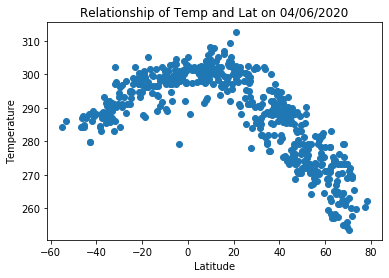

In [35]:
x_values = city_weather_df['Lat']
y_values = city_weather_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Relationship of Temp and Lat on 04/06/2020')
plt.show()

#### Latitude vs. Humidity Plot

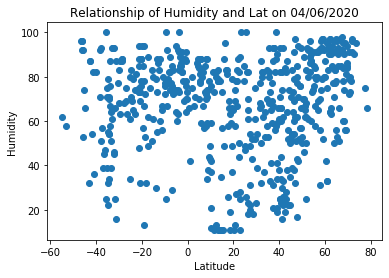

In [36]:
x_values = city_weather_df['Lat']
y_values = city_weather_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Relationship of Humidity and Lat on 04/06/2020')
plt.show()

#### Latitude vs. Cloudiness Plot

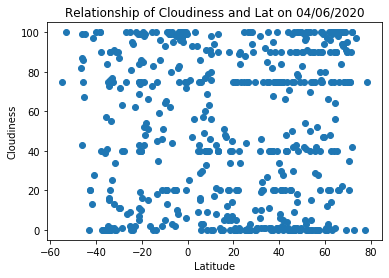

In [37]:
x_values = city_weather_df['Lat']
y_values = city_weather_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Relationship of Cloudiness and Lat on 04/06/2020')
plt.show()

#### Latitude vs. Wind Speed Plot

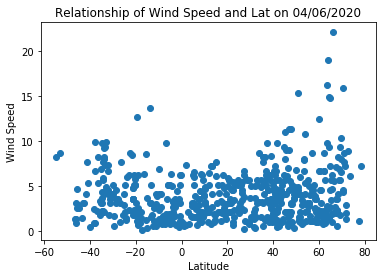

In [38]:
x_values = city_weather_df['Lat']
y_values = city_weather_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Relationship of Wind Speed and Lat on 04/06/2020')
plt.show()

## Linear Regression

In [6]:
# OPTIONAL: Create a function to create Linear Regression plots 
#Your second requirement is to run linear regression on each relationship, 
#only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):


In [7]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression